In [1]:
%matplotlib notebook
import tessreduce as tr
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

In [2]:
ra = 189.1385817
dec = 11.2316535
ra = 261.6219292     
dec = 71.0940694
sector = 22
ra = 73.95900417
dec = -61.75666111
sector = 1
# good example!
ra = 158.8282917     
dec = -13.0054389
sector = 35

ra = 269.0488792
dec = 62.75700278
sector = 21

#ra = 359.3247917
#dec = -15.6314639
#ra = 150.504875
#dec = -15.27333611
#sector = 8
#c = SkyCoord('10 18 13.12 +71 55 44.2', unit=(u.hourangle, u.deg), frame='icrs')
#ra = c.ra.deg
#dec = c.dec.deg
#tess = tr.tessreduce(tpf='../../../../data/tess/2021dbg.fits',verbose=0)#ra=ra,dec=dec,size=90)#,sector=sector)
#ra = 10.59804583
#dec = 41.19782778
#sector = 17
tess = tr.tessreduce(ra=ra,dec=dec,size=90,sector=sector)

made reference
made source mask
calculating background
background subtracted
calculating centroids
images shifted
rerunning for difference image
remade mask
shifting images
background


<IPython.core.display.Javascript object>


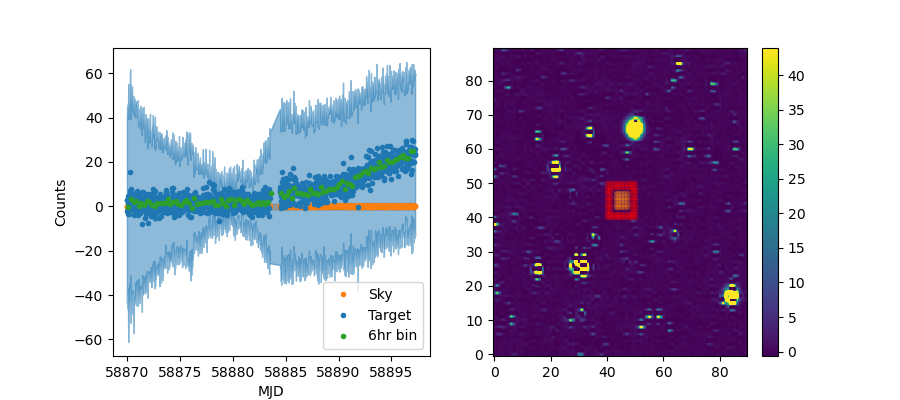

In [3]:
#tess = tr.tessreduce(tpf='../../../../data/tess/2020fqv.fits',verbose=0)
tess.reduce(diff=True)

In [10]:
tess.lc[1] -= np.nanmedian(tess.lc[1,:400])

In [11]:
tess.to_flux()

Calculating field star zeropoint


<IPython.core.display.Javascript object>


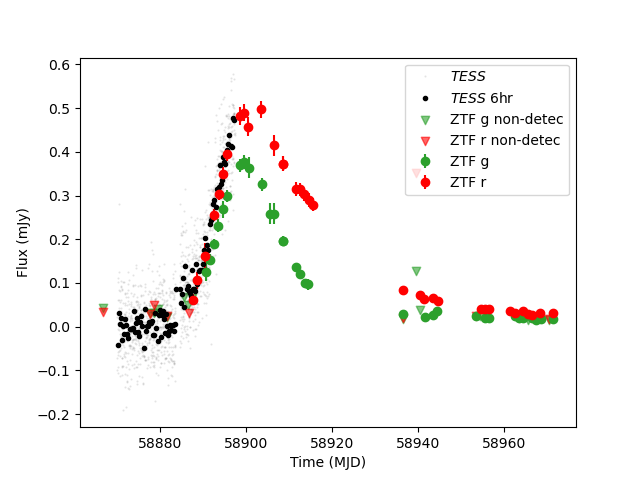

In [13]:
tess.plotter(ground=True)

<IPython.core.display.Javascript object>


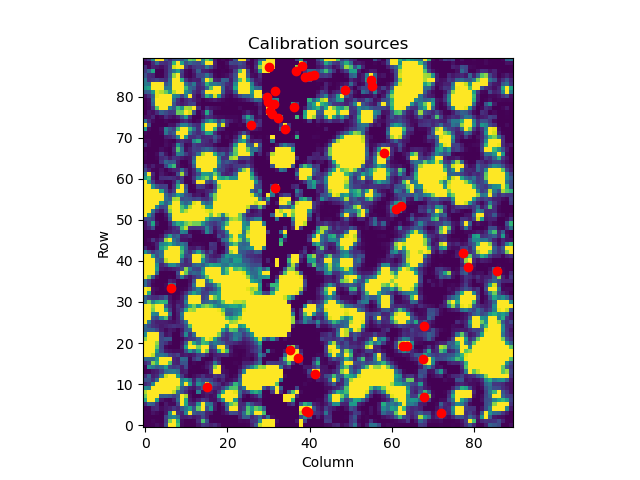

<IPython.core.display.Javascript object>


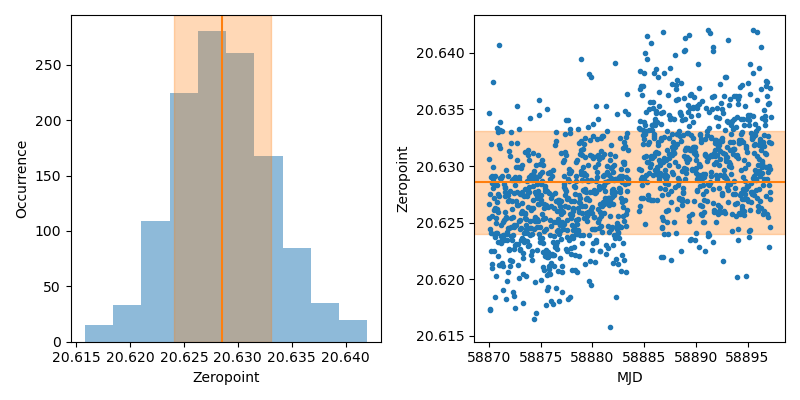

In [14]:
tess.field_calibrate(plot=True)

In [15]:
tess.tzp

20.628555896263407

In [16]:
tess.tzp_e

0.004513444057767582

In [14]:
table = tr.Get_Catalogue(tess.tpf,Catalog='ps1')

In [15]:
table

,RAJ2000,DEJ2000,objID,f_objID,Qual,e_RAJ2000,e_DEJ2000,_tab1_10,Ns,Nd,...,zmag,e_zmag,zKmag,e_zKmag,zFlags,ymag,e_ymag,yKmag,e_yKmag,yFlags
0,158.964881,-13.505899,91791589648883333,436527104,52,0.0498,0.0911,56307.917373,4,12,...,21.3948,0.2076,21.0152,0.0098,115000,NaN,NaN,NaN,NaN,16416
1,158.971318,-13.500072,91801589713150243,436527104,52,0.0375,0.0376,55984.944676,3,16,...,20.7886,0.0297,20.7883,0.0879,115000,20.0438,0.1569,19.9733,0.3327,115000
2,158.970615,-13.502782,91791589705087037,302145536,36,0.0853,0.0853,56429.603796,0,4,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
3,158.970705,-13.502828,91791589708106921,436527104,52,0.0509,0.0600,56277.751910,4,14,...,21.6593,0.1939,21.0926,0.2458,16892216,NaN,NaN,NaN,NaN,16416
4,158.970248,-13.498992,91801589702951668,436527104,52,0.0640,0.0636,55974.140590,3,9,...,21.0135,0.0373,21.0498,0.0818,115000,NaN,NaN,NaN,NaN,114720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16820,158.771310,-12.483475,93021587713370151,444915712,53,0.0105,0.0098,55995.392824,5,58,...,19.3830,0.0166,18.8733,0.0226,16892216,19.1893,0.0629,18.6616,0.0852,16892216
16821,158.766000,-12.486564,93011587660526483,436527104,52,0.0122,0.0257,56077.356817,5,64,...,18.4867,0.0064,18.5641,0.0094,115000,18.4837,0.0303,18.5374,0.0497,115000
16822,158.752638,-12.499771,93001587526290626,310452224,37,0.0348,0.0348,55675.416759,0,4,...,19.4617,0.0000,18.7517,0.0000,16777752,18.8633,0.1313,18.6636,0.1965,16777488
16823,158.752938,-12.497965,93001587530722738,436281344,52,0.1019,0.1019,55873.490324,4,4,...,21.1177,0.1878,NaN,NaN,115000,NaN,NaN,NaN,NaN,16416


In [21]:
import pandas as pd

In [23]:
tic = pd.read_csv('/Users/rridden/Downloads/test.csv')

In [24]:
dist = np.sqrt((dd.RAJ2000.values[:,np.newaxis] - tic.RAJ2000.values[np.newaxis,:])**2 + (dd.DEJ2000.values[:,np.newaxis] - tic.DEJ2000.values[np.newaxis,:])**2)

In [26]:
3/60**2

0.0008333333333333334

In [30]:
ind1, ind2 = np.where(dist <= 3/60**2)

In [37]:
diff = tic.iloc[ind2]['Tmag'].values - dd.iloc[ind1]['tmag'].values

In [41]:
np.nanmedian(diff) + tess.tzp

20.4797932282207

<IPython.core.display.Javascript object>


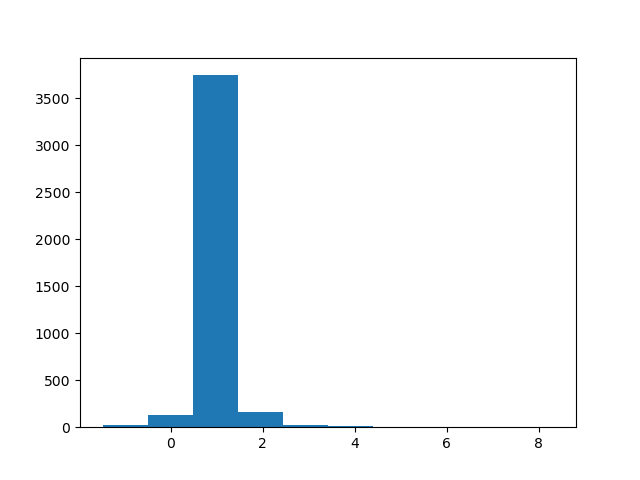

(array([2.300e+01, 1.290e+02, 3.747e+03, 1.600e+02, 1.900e+01, 1.000e+01,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-1.48217907, -0.50208417,  0.47801074,  1.45810565,  2.43820055,
         3.41829546,  4.39839037,  5.37848527,  6.35858018,  7.33867509,
         8.31876999]),
 <BarContainer object of 10 artists>)

In [39]:
plt.figure()
plt.hist(diff)

In [ ]:
d = tr.PS1_to_TESS_mag(table,ebv=tess.ebv)

In [19]:
dd = d.iloc[np.isfinite(d.tmag.values)]

In [20]:
dd

,RAJ2000,DEJ2000,objID,f_objID,Qual,e_RAJ2000,e_DEJ2000,_tab1_10,Ns,Nd,...,e_zmag,zKmag,e_zKmag,zFlags,ymag,e_ymag,yKmag,e_yKmag,yFlags,tmag
10,158.980219,-13.506510,91791589802372569,503636096,60,0.0053,0.0154,56151.290162,5,46,...,0.0095,18.1414,0.0133,115000,17.7816,0.0083,17.8864,0.0315,115000,17.410998
12,158.973385,-13.507865,91791589733950957,444915712,53,0.0158,0.0216,56329.012500,5,39,...,0.0310,18.8846,0.0222,16892216,19.3682,0.1327,18.6057,0.1037,16892216,18.429522
13,158.960195,-13.513666,91781589602243976,503635968,60,0.0056,0.0055,56058.551296,5,56,...,0.0049,13.4523,0.0015,115000,13.3855,0.0012,13.4101,0.0026,115000,12.116421
15,158.994438,-13.487302,91811589944565610,503635968,60,0.0060,0.0138,56165.015961,5,55,...,0.0058,18.3217,0.0191,115000,18.0788,0.0106,18.1801,0.0474,115000,17.264466
16,158.996888,-13.486585,91811589969306463,503635968,60,0.0054,0.0088,56166.168877,5,53,...,0.0056,17.4252,0.0049,115000,17.1537,0.0161,17.2365,0.0161,115000,16.413455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16813,158.804290,-12.485805,93011588042687334,436527104,52,0.0245,0.0306,55780.125764,5,32,...,0.0437,20.4268,0.0769,16892216,20.0182,0.1887,NaN,NaN,115000,19.474860
16815,158.790405,-12.483214,93021587904050426,436527232,52,0.0143,0.0131,55999.038299,5,46,...,0.0145,19.7628,0.0299,115000,19.3838,0.0536,19.4319,0.0762,115000,18.766846
16816,158.797131,-12.493618,93001587971578007,512024576,61,0.0055,0.0063,55943.660093,5,56,...,0.0191,17.9519,0.0170,16892216,18.4621,0.0294,17.8267,0.0560,16892216,17.510192
16820,158.771310,-12.483475,93021587713370151,444915712,53,0.0105,0.0098,55995.392824,5,58,...,0.0166,18.8733,0.0226,16892216,19.1893,0.0629,18.6616,0.0852,16892216,18.294419


In [3]:
tess.ground.get_ztf()

<IPython.core.display.Javascript object>


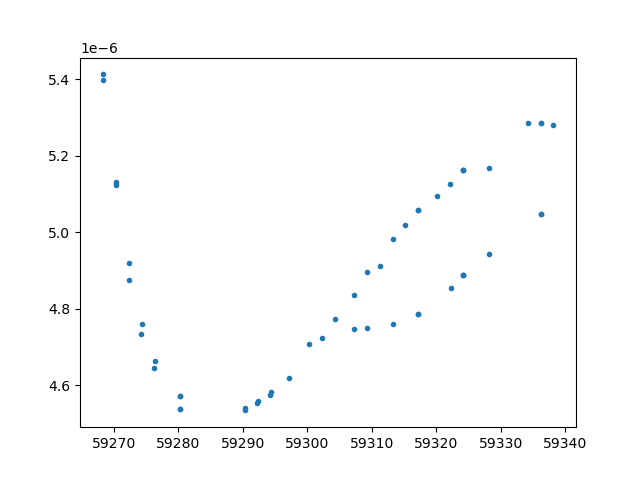

In [9]:
plt.figure()
plt.plot(tess.ground.ztf.mjd,tess.ground.ztf.flux,'.')

<IPython.core.display.Javascript object>


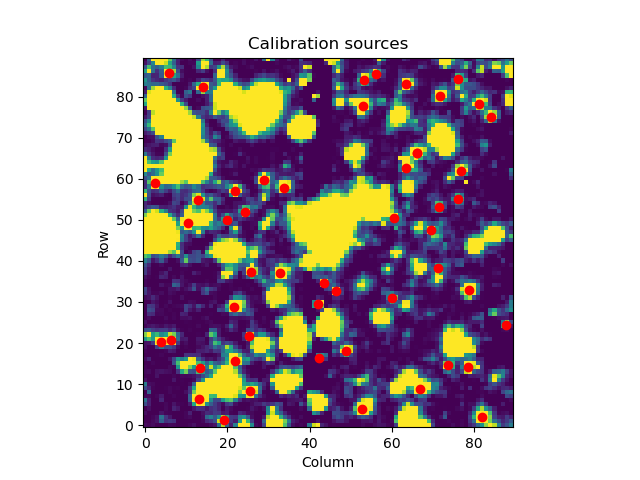

<IPython.core.display.Javascript object>


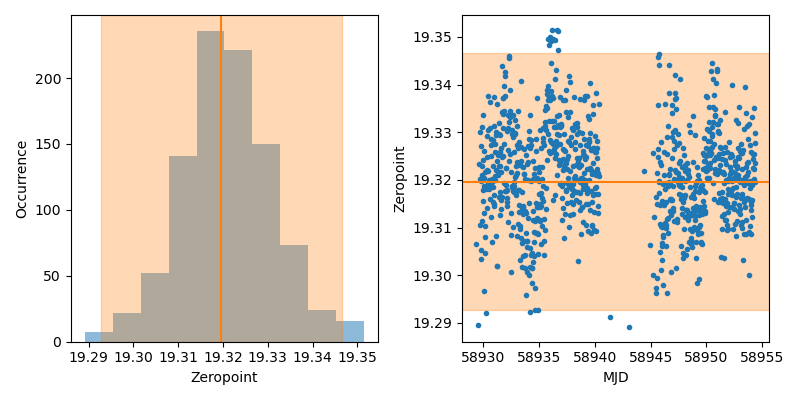

In [7]:
tess.field_calibrate(plot=True)

In [19]:
tess.lc = tess.detrend_transient()

In [22]:
tess.events

array([[[5.89276205e+04, 5.89276414e+04, 5.89276622e+04, ...,
         5.89543286e+04, 5.89543494e+04, 5.89543703e+04],
        [           nan,            nan,            nan, ...,
         3.66704139e+00, 3.88012710e+00, 4.04248669e+00]]])

In [11]:
tess.zp

19.319639228821405

In [17]:
tess.to_flux(zp=20.44,flux_type='mjy')

In [ ]:
tess.to_mag()

<IPython.core.display.Javascript object>


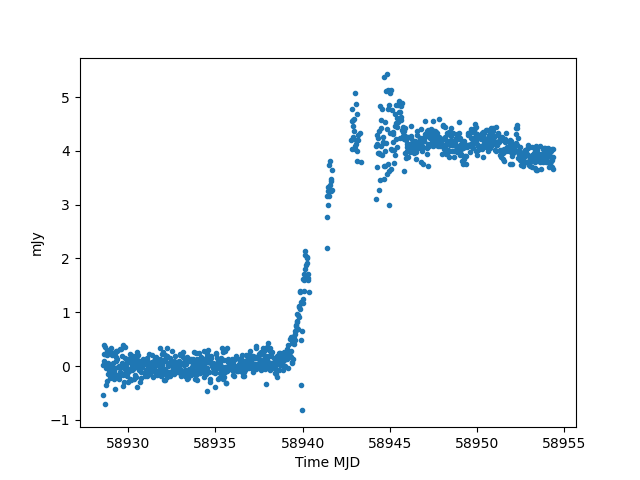

In [20]:
tess.plotter()

<IPython.core.display.Javascript object>


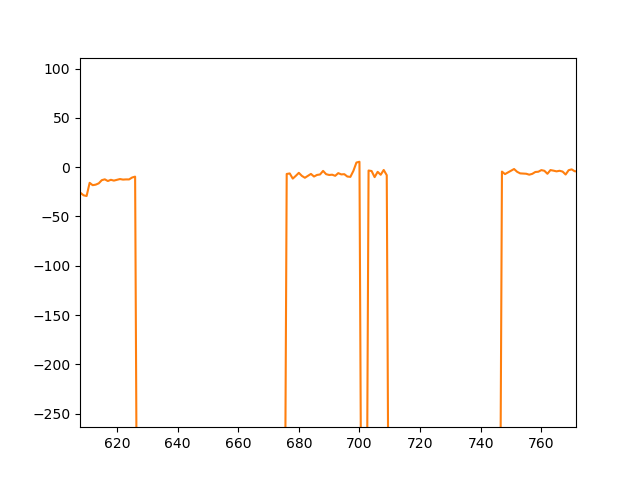

In [20]:
plt.figure()
plt.plot(tess.bkg[:,45,45])
plt.plot((tess.flux[:,45,45]-tess.ref[45,45]))

<IPython.core.display.Javascript object>


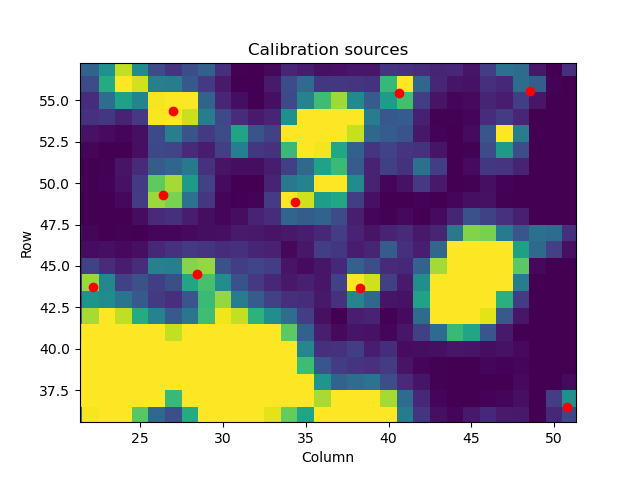

<IPython.core.display.Javascript object>


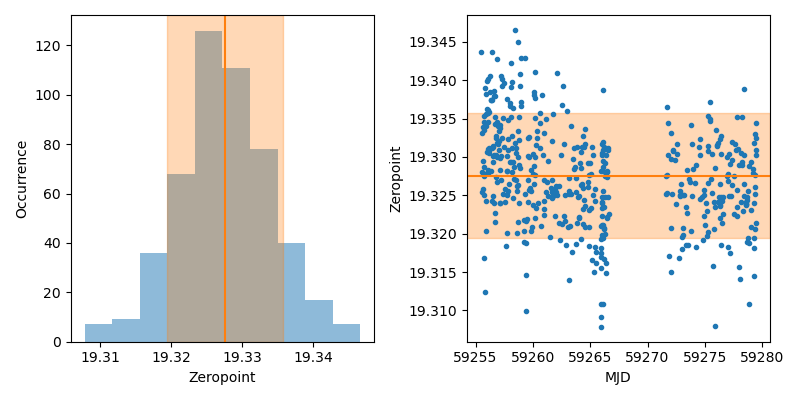

In [3]:
tess.field_calibrate(plot=True)

<IPython.core.display.Javascript object>


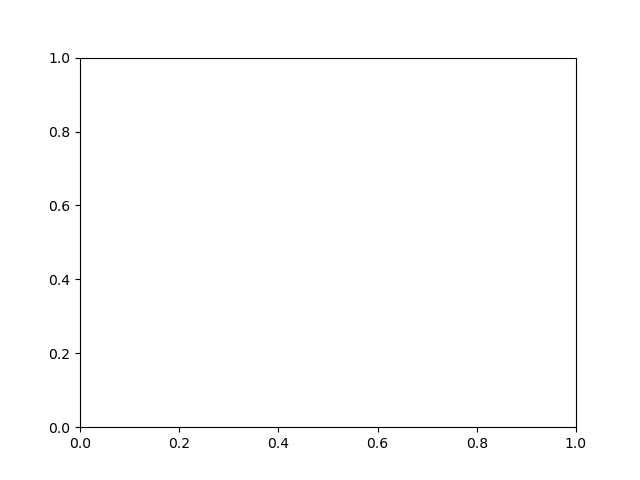

In [7]:
fig= plt.figure()
ax = plt.gca()

In [5]:
tess.zp

19.32756556086362

In [88]:
lc,sky = tess.Diff_lc(tar_ap=7,sky_in=9,sky_out=11)
tess.lc = lc

<IPython.core.display.Javascript object>


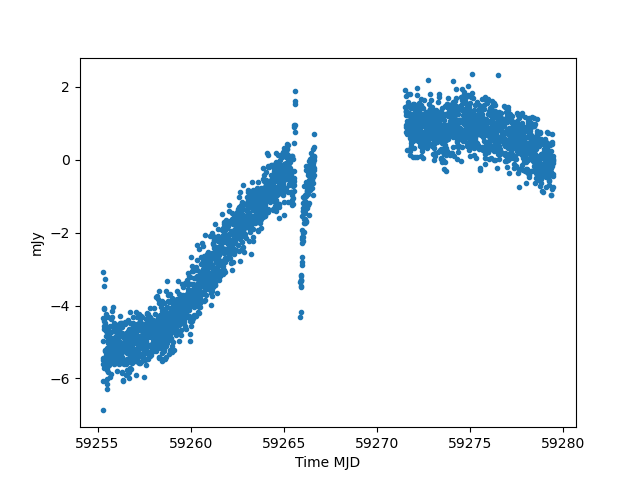

In [9]:
tess.to_flux()
tess.plotter()

<IPython.core.display.Javascript object>


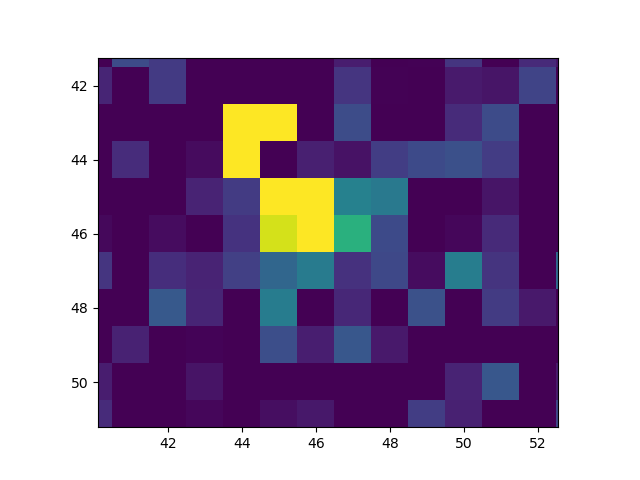

In [75]:
plt.figure()
plt.imshow((tess.flux[1000]-tess.flux[100]),vmin=0,vmax=10)

In [4]:
tess.to_flux()

Calculating field star zeropoint


In [7]:
tess.tzp

15.46156225682796

<IPython.core.display.Javascript object>


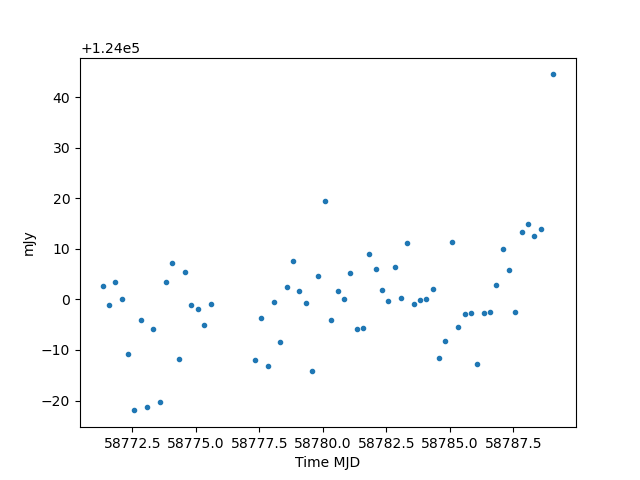

In [5]:
tess.plotter(lc=tess.bin_data())

In [12]:
np.log10(10**3)

3.0

In [13]:
89+2.5*3

96.5

In [7]:
plt.gca().invert_yaxis()

<IPython.core.display.Javascript object>


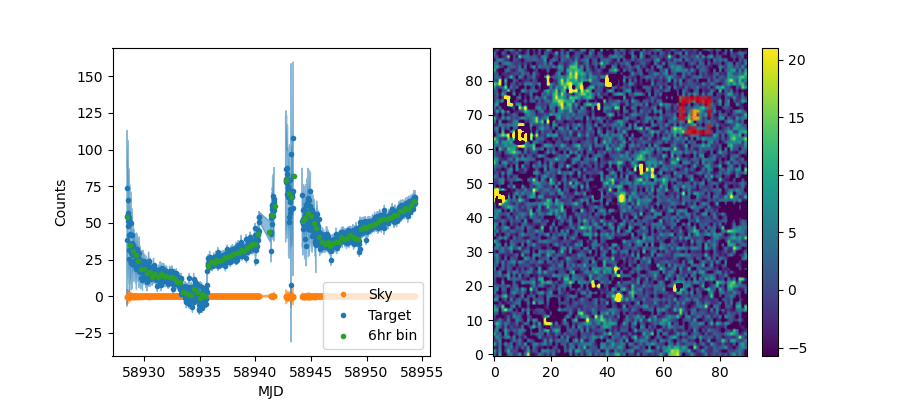

In [6]:
lc = trc.Diff_lc(tar_ap=3,sky_out=11,sky_in=7,x=71,y=70,plot=True)

In [7]:
trc.wcs.all_pix2world(71,70,0)

[array(189.32991499), array(11.30859566)]

<IPython.core.display.Javascript object>


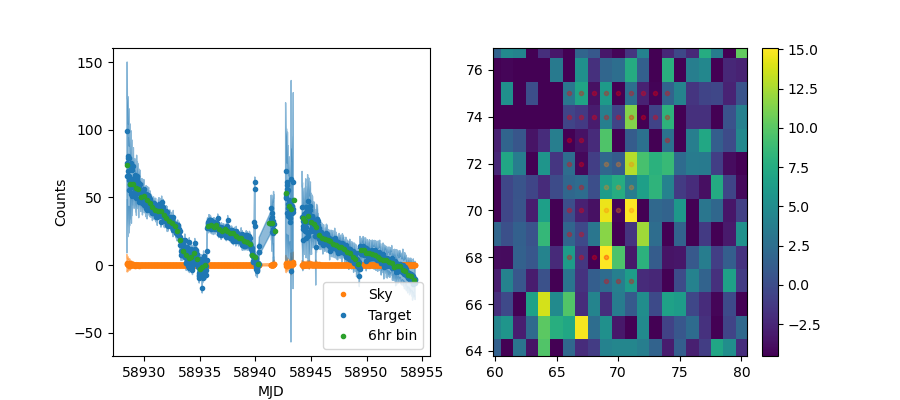

In [20]:
lc = trc.Diff_lc(x=70,y=71,tar_ap=3,plot=True)

In [34]:
from astropy.coordinates import SkyCoord
from astropy import units as u

In [35]:
c = SkyCoord(ra = 249.8193456*u.deg,dec=66.22074498*u.deg)

In [36]:
c.ra

<Longitude 249.8193456 deg>

In [27]:
import pandas as pd
from astropy.time import Time
ass = pd.read_csv('../../strange_things/random_var.csv')
astime = ass.HJD.values
assflux = ass['flux(mJy)'].values
err = ass.flux_err.values
ind = (assflux < 10) & (err < 1)
assflux = assflux[ind]
astime = astime[ind]
err = err[ind]
ass_mjd = Time(astime,format='jd').mjd

<IPython.core.display.Javascript object>


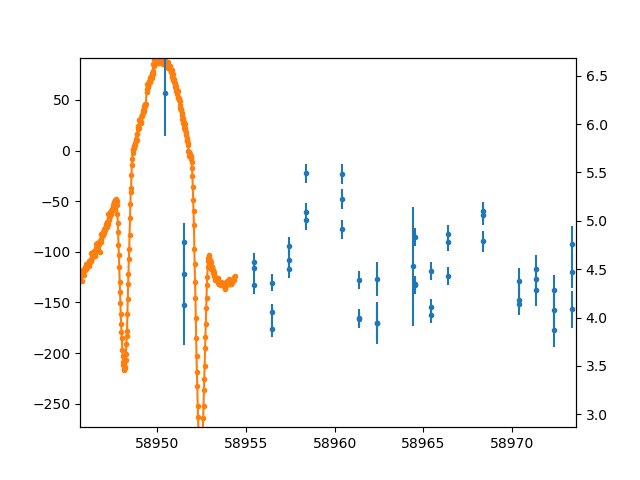

<ErrorbarContainer object of 3 artists>

In [33]:
fig, ax1 = plt.subplots()
plt.plot(trc.lc[0],trc.lc[1],'.-',color='C1')
#plt.xlim(58692,58694)

ax2 = ax1.twinx() 
ax2.errorbar(ass_mjd,assflux,yerr=err,fmt='.')
#plt.ylim(2.5,5)

In [11]:
trc.shift

array([[-0.00190758, -0.24534336],
       [-0.00147367, -0.23621583],
       [-0.00116832, -0.22773165],
       ...,
       [ 0.01156276,  0.037385  ],
       [ 0.01161504,  0.03781539],
       [ 0.01166768,  0.03825187]])

In [12]:
tr.shift(trc.tpf.flux.value[558],[-trc.shift[558,0],-trc.shift[558,1]])

array([[  0.      ,  89.88899 ,  90.476425, ...,  97.25344 ,  93.70026 ,
         89.44288 ],
       [  0.      ,  92.99711 ,  90.952805, ...,  93.30248 ,  90.93512 ,
         89.6758  ],
       [  0.      ,  93.30771 ,  90.13485 , ..., 100.73462 , 102.84759 ,
         94.72203 ],
       ...,
       [  0.      ,  89.92841 ,  89.933044, ...,  90.83398 ,  92.01596 ,
         96.15251 ],
       [  0.      ,  91.563736,  91.08587 , ...,  91.65742 ,  91.62713 ,
         94.32599 ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]], dtype=float32)

<IPython.core.display.Javascript object>


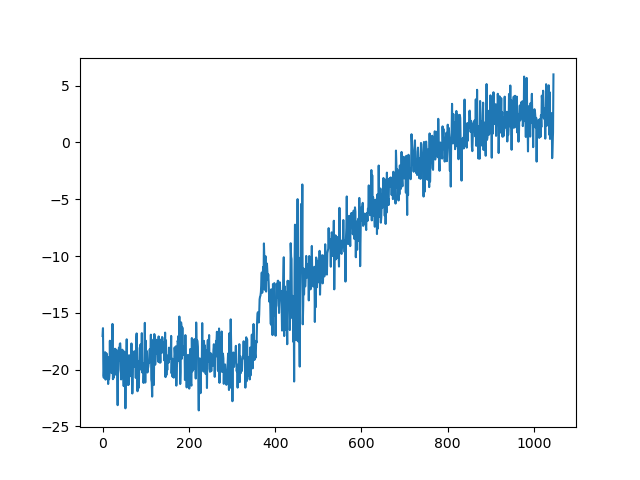

In [39]:
plt.figure()
plt.plot(trc.lc[1])

<IPython.core.display.Javascript object>


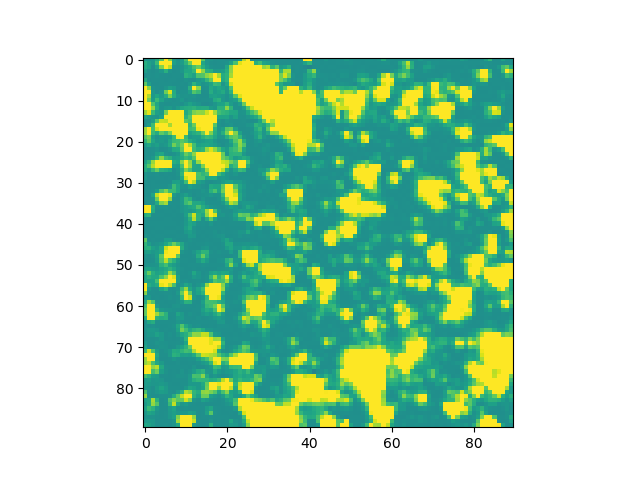

<IPython.core.display.Javascript object>


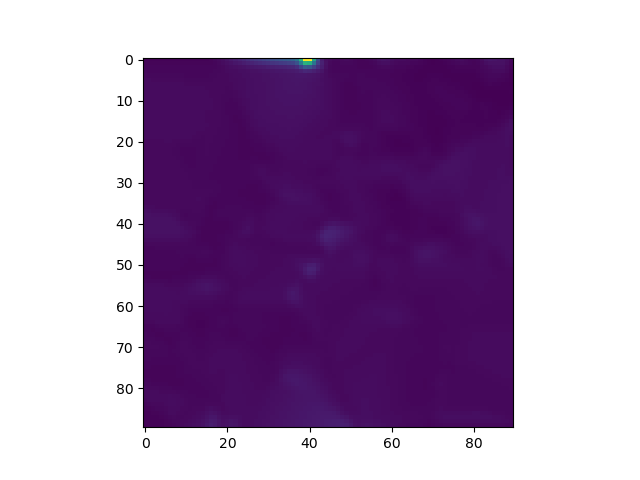

In [4]:
plt.figure()
plt.imshow(trc.flux[558],vmax=20,vmin=-20)

plt.figure()
plt.imshow(trc.bkg[558])

In [6]:
trc.shift[558]

array([ 0.0032747 , -0.04801653])

<IPython.core.display.Javascript object>


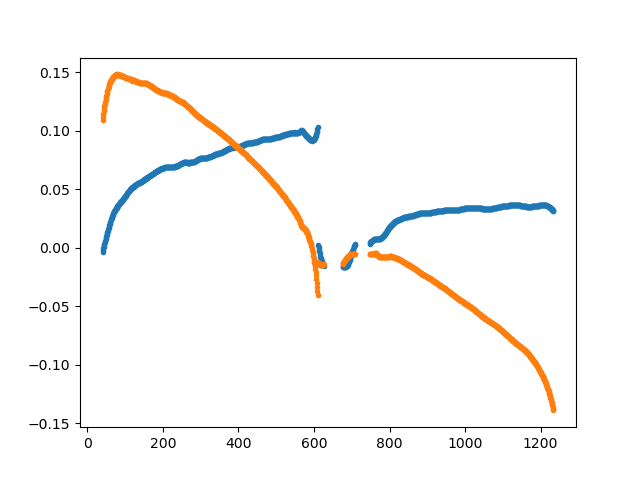

In [13]:
plt.figure()
plt.plot(trc.shift[:,0],'.')
plt.plot(trc.shift[:,1],'.')

In [97]:
s = np.nansum(f,axis=(1,2))
s[s==0] = 1e10
ind = np.argmin(np.nansum(f))
ref = f[ind]*ap_sky
perc = np.percentile(ref[np.isfinite(ref)].flatten(),90)
#ap_sky[ref> perc] = np.nan
mask = tr.sigma_clip((trc.ref)*ap_sky).mask
ap_sky[mask] = np.nan

In [93]:
np.nanstd((f[0]-trc.ref)*ap_sky)

2.089138612591031

<IPython.core.display.Javascript object>


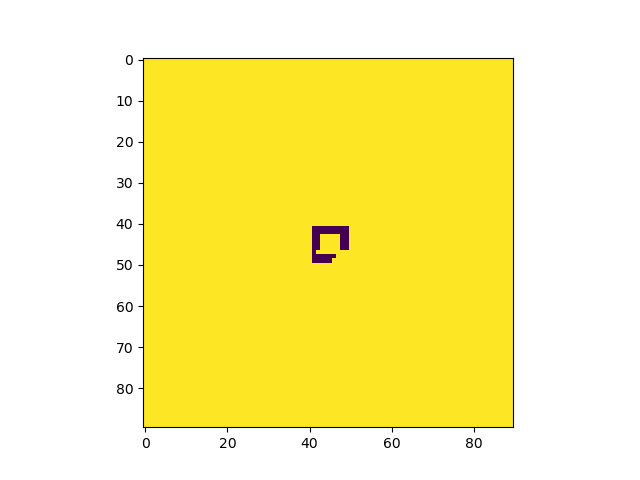

In [98]:
plt.figure()
plt.imshow(mask*1)

<IPython.core.display.Javascript object>


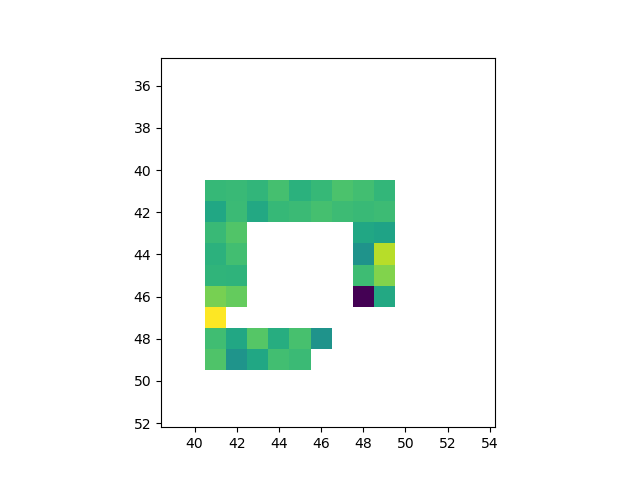

In [99]:
plt.figure()
plt.imshow((f[0]-trc.ref)*ap_sky)

<IPython.core.display.Javascript object>


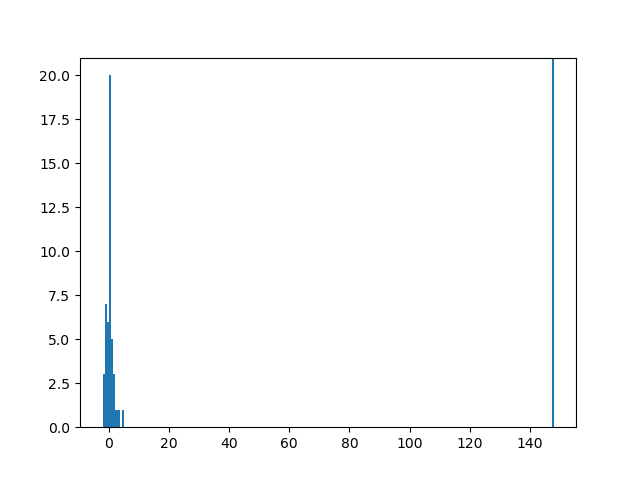

In [88]:
plt.figure()
plt.hist((f[0]*ap_sky-trc.ref).flatten())
plt.axvline(perc)

In [23]:
perc

nan

In [ ]:
np.percentile(sky,)

In [71]:
np.diff(bined[0])

array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25])

<IPython.core.display.Javascript object>


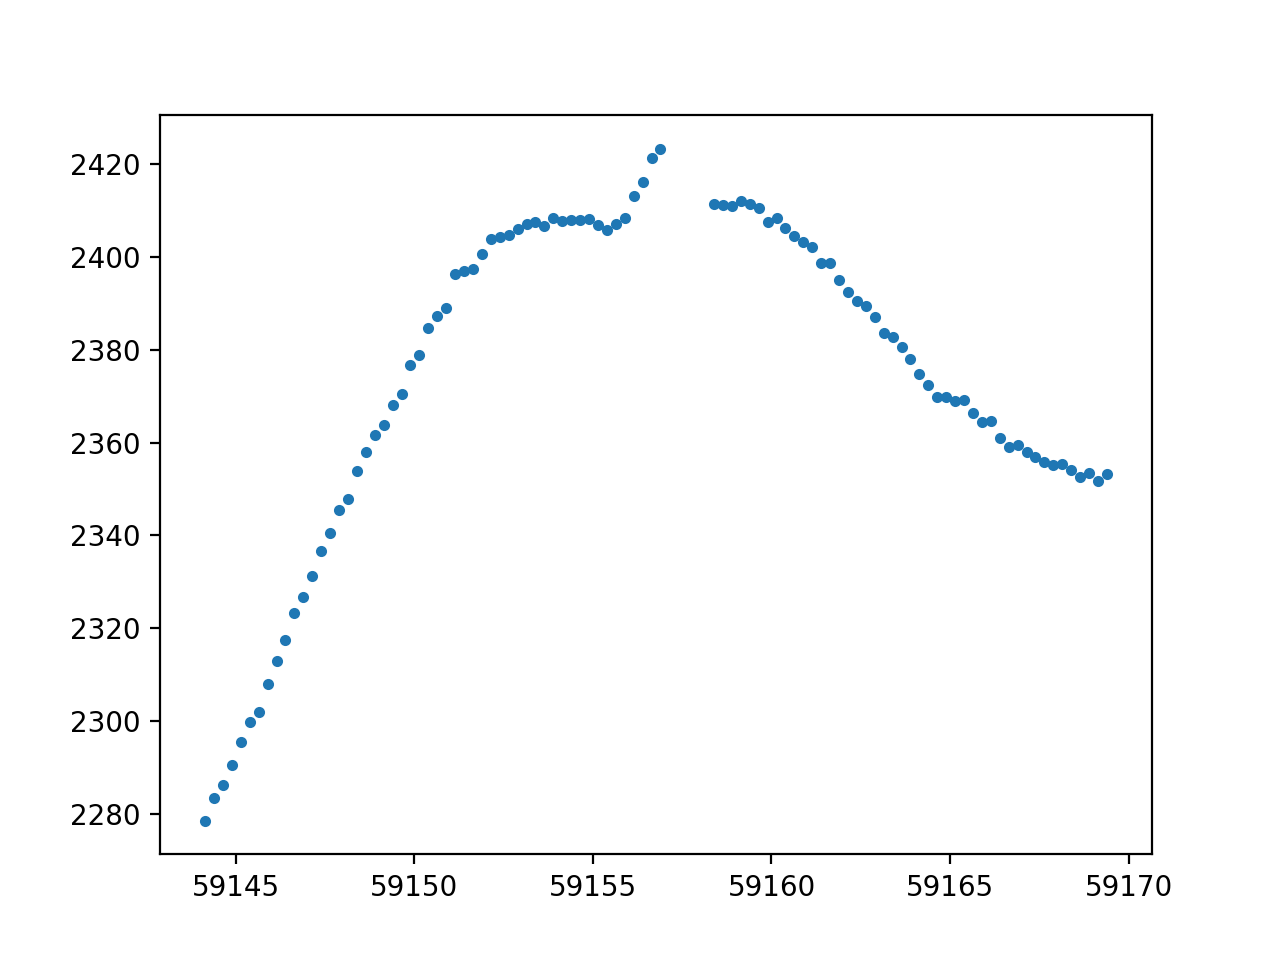

In [70]:
plt.figure()
plt.plot(bined[0],bined[1],'.')

In [42]:
f.shape

(102, 3445)

In [47]:
t

(array([  0,   0,   0, ..., 101, 101, 101]),
 array([   0,    1,    2, ..., 3442, 3443, 3444]))

In [45]:
f[:,t[1]]

array([[2277.3175836 , 2275.13283895, 2278.02926717, ..., 2346.02920958,
        2347.05976083, 2352.70210803],
       [2277.3175836 , 2275.13283895, 2278.02926717, ..., 2346.02920958,
        2347.05976083, 2352.70210803],
       [2277.3175836 , 2275.13283895, 2278.02926717, ..., 2346.02920958,
        2347.05976083, 2352.70210803],
       ...,
       [2277.3175836 , 2275.13283895, 2278.02926717, ..., 2346.02920958,
        2347.05976083, 2352.70210803],
       [2277.3175836 , 2275.13283895, 2278.02926717, ..., 2346.02920958,
        2347.05976083, 2352.70210803],
       [2277.3175836 , 2275.13283895, 2278.02926717, ..., 2346.02920958,
        2347.05976083, 2352.70210803]])

In [11]:
trc.event_plotter()

AxisError: axis 1 is out of bounds for array of dimension 1

In [10]:
test = trc.Remove_background_var()

(1107,)


<IPython.core.display.Javascript object>


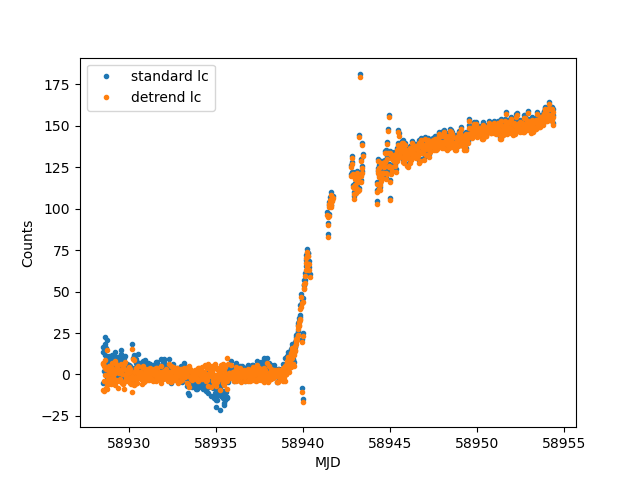

In [17]:
plt.figure()
plt.plot(trc.lc[0],trc.lc[1],'.',label='standard lc')
plt.plot(test[0],test[1],'.',label='detrend lc')

plt.ylabel('Counts')
plt.xlabel('MJD')
plt.legend()
plt.savefig('detrend_comparison.png')

In [8]:
test.shape

(1, 3, 1235)

In [9]:
test[0]

array([[5.89276205e+04, 5.89276414e+04, 5.89276622e+04, ...,
        5.89543286e+04, 5.89543494e+04, 5.89543703e+04],
       [           nan,            nan,            nan, ...,
        1.51907805e+02, 1.56499050e+02, 1.59895309e+02],
       [           nan,            nan,            nan, ...,
        2.37283449e+01, 2.39588317e+01, 2.32243402e+01]])

In [5]:
~(a is None)

-1

In [6]:
np.isfinite(trc.lc[1])

array([False, False, False, ...,  True,  True,  True])